In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire
from prepare import prep_store_data
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = get_store_data()
df.head()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


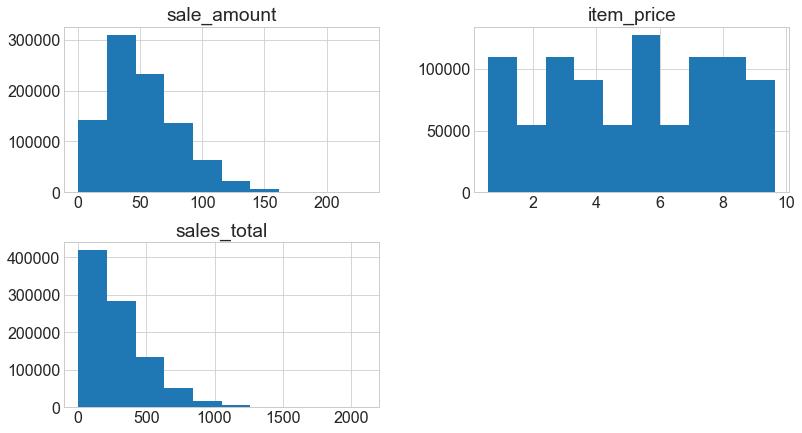

In [3]:
df = prep_store_data(df)
df.head()

# STORE DATASET

### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [29]:
df.groupby(['sale_date']).sales_total.sum()

sale_date
2013-01-01 00:00:00+00:00     73844.01
2013-01-02 00:00:00+00:00     73570.58
2013-01-03 00:00:00+00:00     78169.48
2013-01-04 00:00:00+00:00     84467.73
2013-01-05 00:00:00+00:00     87621.85
                               ...    
2017-12-27 00:00:00+00:00    109151.15
2017-12-28 00:00:00+00:00    117377.49
2017-12-29 00:00:00+00:00    126541.84
2017-12-30 00:00:00+00:00    134903.07
2017-12-31 00:00:00+00:00    140905.74
Name: sales_total, Length: 1826, dtype: float64

<AxesSubplot:xlabel='sale_date'>

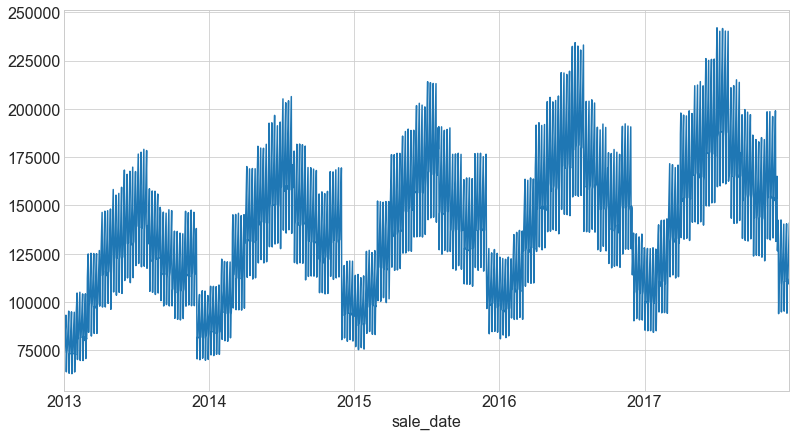

In [28]:
# here, we aggregate by sales_total and sale_date--results in a solitary date per observation
df.groupby(['sale_date']).sales_total.sum().plot()

In [5]:
df.shape

(913000, 16)

In [12]:
df.index.max(), df.index.min(), df.index.max() - df.index.min()

(Timestamp('2017-12-31 00:00:00+0000', tz='UTC'),
 Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timedelta('1825 days 00:00:00'))

In [14]:
# df.isna().sum()
# NO NULLS

In [59]:
by_date = df.groupby(['sale_date']).sales_total.sum().reset_index()

In [60]:
by_date

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


In [67]:
first_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale.head()

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [64]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

- This aspect of explo is continued in Adam's Prepare lesson

## Splitting

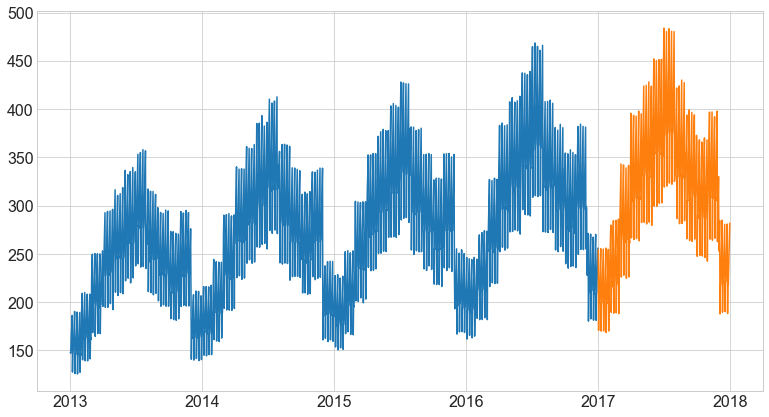

In [90]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sales_total.mean().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sales_total.mean().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sales_total)
plt.plot(test_by_date.sale_date, test_by_date.sales_total)
plt.show()

- ok, i did a human-based split up to 2017 (pre-2017 is train, 2017 is test)

In [91]:
train.shape, test.shape

((730500, 16), (182500, 16))

In [92]:
train.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [93]:
train_by_date = train.groupby(['sale_date']).sales_total.mean().reset_index()
train_by_date.head()

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,147.68802
1,2013-01-02 00:00:00+00:00,147.14116
2,2013-01-03 00:00:00+00:00,156.33896
3,2013-01-04 00:00:00+00:00,168.93546
4,2013-01-05 00:00:00+00:00,175.24370


In [94]:
train_by_date = train_by_date.set_index("sale_date").sort_index()

In [95]:
train_by_date.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


In [96]:
test_by_date = test.groupby(['sale_date']).sales_total.mean().reset_index()
test_by_date = test_by_date.set_index('sale_date').sort_index()
test_by_date.head(1)

,sales_total
sale_date,
2017-01-01 00:00:00+00:00,254.52542


<AxesSubplot:xlabel='sale_date'>

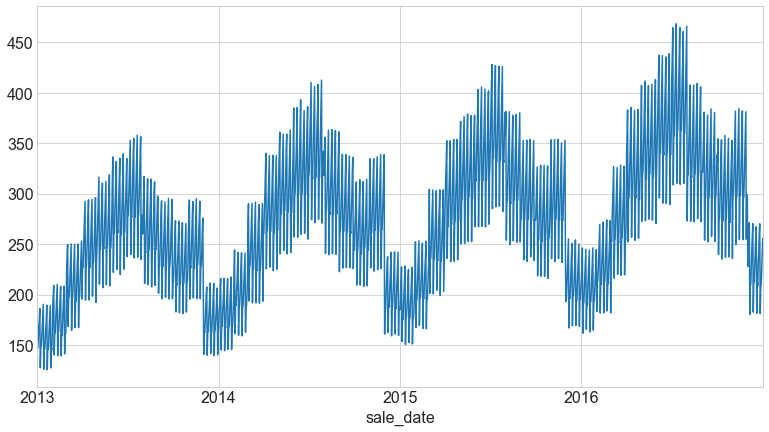

In [97]:
y = train_by_date.sales_total
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

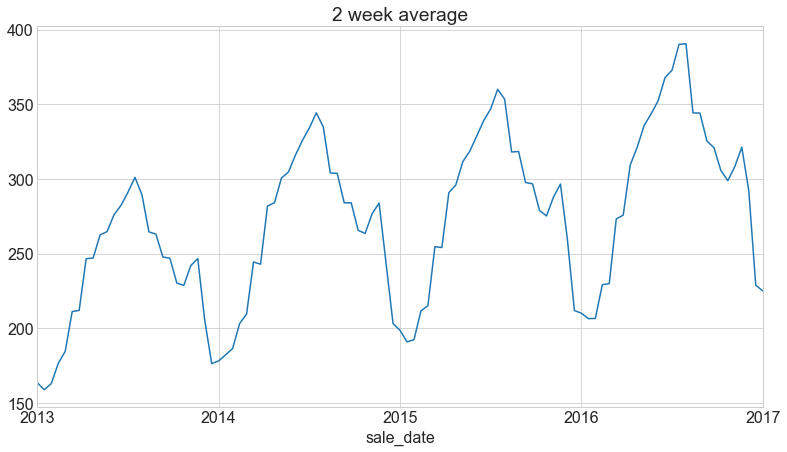

In [98]:
y.resample('2W').mean().plot(title='2 week average')

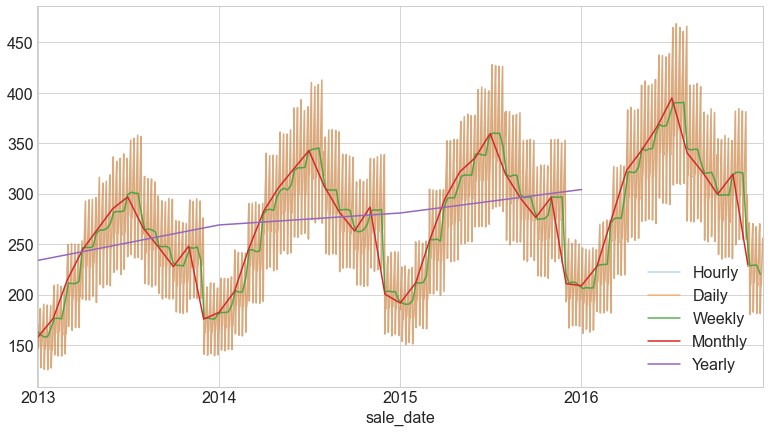

In [99]:
ax = y.plot(alpha=.3, label='Hourly')
y.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

- amazing plot